In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [3]:
validation_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('C:/Users/nitin/Downloads/DATASET1/Train',
                                                    batch_size =64,
                                                    class_mode = 'binary',
                                                    target_size = (64,64))     

validation_generator =  validation_datagen.flow_from_directory( 'C:/Users/nitin/Downloads/DATASET1/Validation',
                                                          batch_size  = 64,
                                                          class_mode  = 'binary',
                                                          target_size = (64,64))

Found 4941 images belonging to 2 classes.
Found 9190 images belonging to 2 classes.


In [4]:
# Building Model
model=Sequential()

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 512)       14336     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 512)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 512)       2048      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       589952    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                        

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [6]:
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           epochs=2)

C:\Users\nitin\AppData\Local\Temp\ipykernel_16460\366948582.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/2
78/78 [==============================] - 516s 7s/step - loss: 0.6159 - accuracy: 0.6669 - val_loss: 1.1401 - val_accuracy: 0.3483
Epoch 2/2
78/78 [==============================] - 541s 7s/step - loss: 0.5262 - accuracy: 0.7399 - val_loss: 0.7076 - val_accuracy: 0.6471


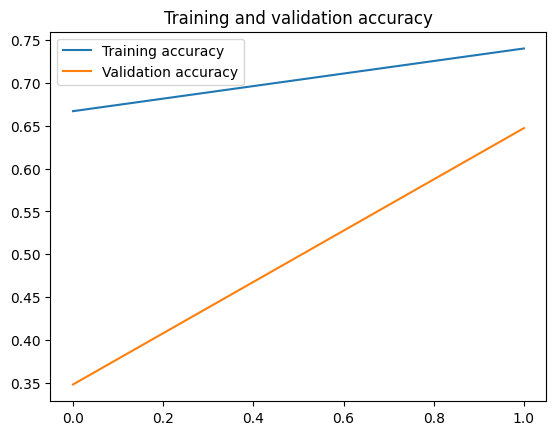

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.figure()
plt.show()

In [1]:
import numpy as np
from keras.preprocessing import image

#  images test 2
path_testmodel = "C:/Users/nitin/Downloads/DATASET1/Test/women/139.jpg"
imge = image.load_img(path_testmodel, target_size=(64,64))
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a female")
plt.imshow(imge)

NameError: name 'model' is not defined

1/1 [==============================] - 0s 34ms/step
[0.]
This is a male


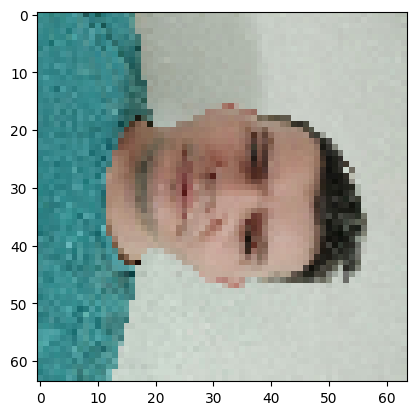

In [23]:
import numpy as np
from keras.preprocessing import image

#  images test 2
path_testmodel = "C:/Users/nitin/Downloads/DATASET1/Test/men/137.jpg"
imge = image.load_img(path_testmodel, target_size=(64,64))
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
plt.imshow(imge)